In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#locate files from computer 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import logit
from __future__ import print_function
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
import pandas as pd
import numpy as np 
import seaborn as sns
#import plotly.express as px
#import plotly.graph_objs as go
#import plotly#.plotly as py
import uuid 
import re
#import plotly.express as px
from matplotlib import pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn
from sklearn.preprocessing import StandardScaler


In [2]:
cd//Users/esekhaigbe/Downloads/codes

/Users/esekhaigbe/Downloads/codes


In [3]:
# locate and load file to Read 
#df = pd.read_csv('persontourfile.csv')
#df = pd.read_csv('2017mergedontournhts1.csv')
df = pd.read_csv('tripandmergedfile.csv')
#df = pd.read_csv('2017NHTStour.csv')
df

,Person,Unnamed: 0,Tour,Stop,P_Destination,HOUSEID_x,PERSONID_x,R_AGE_x,EDUC_x,R_HISP,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007-1,0,1.0,NaN,1.0,30000007,1,67,3,2,...,20,750,300,50,750,300,350,30,300,300
1,30000007-2,1,1.0,NaN,1.0,30000007,2,66,3,2,...,40,1500,750,50,1500,750,750,20,750,300
2,30000007-3,2,1.0,NaN,1.0,30000007,3,28,2,2,...,20,750,300,50,750,300,350,60,750,300
3,30000008-1,3,1.0,NaN,1.0,30000008,1,55,5,2,...,5,300,300,30,300,300,150,40,1500,750
4,30000012-1,4,1.0,7.0,1.0,30000012,1,45,5,2,...,60,17000,7000,30,750,300,350,5,750,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,40794293-2,206585,1.0,NaN,1.0,40794293,2,62,2,2,...,20,50,50,20,50,50,25,30,50,50
206586,40794301-2,206586,1.0,3.0,1.0,40794301,2,59,4,2,...,20,300,50,40,300,50,25,50,300,50
206587,40794301-3,206587,1.0,3.0,NaN,40794301,3,22,3,2,...,20,300,50,40,3000,1500,1500,50,3000,1500
206588,40794301-6,206588,1.0,1.0,NaN,40794301,6,12,-1,2,...,20,300,50,40,3000,1500,1500,50,3000,1500


In [4]:
df['Avg_stop'] = df['Stop']/df['Tour']
df

,Person,Unnamed: 0,Tour,Stop,P_Destination,HOUSEID_x,PERSONID_x,R_AGE_x,EDUC_x,R_HISP,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,Avg_stop
0,30000007-1,0,1.0,NaN,1.0,30000007,1,67,3,2,...,750,300,50,750,300,350,30,300,300,NaN
1,30000007-2,1,1.0,NaN,1.0,30000007,2,66,3,2,...,1500,750,50,1500,750,750,20,750,300,NaN
2,30000007-3,2,1.0,NaN,1.0,30000007,3,28,2,2,...,750,300,50,750,300,350,60,750,300,NaN
3,30000008-1,3,1.0,NaN,1.0,30000008,1,55,5,2,...,300,300,30,300,300,150,40,1500,750,NaN
4,30000012-1,4,1.0,7.0,1.0,30000012,1,45,5,2,...,17000,7000,30,750,300,350,5,750,300,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,40794293-2,206585,1.0,NaN,1.0,40794293,2,62,2,2,...,50,50,20,50,50,25,30,50,50,NaN
206586,40794301-2,206586,1.0,3.0,1.0,40794301,2,59,4,2,...,300,50,40,300,50,25,50,300,50,3.0
206587,40794301-3,206587,1.0,3.0,NaN,40794301,3,22,3,2,...,300,50,40,3000,1500,1500,50,3000,1500,3.0
206588,40794301-6,206588,1.0,1.0,NaN,40794301,6,12,-1,2,...,300,50,40,3000,1500,1500,50,3000,1500,1.0


In [5]:
df.update(df[['P_Destination','Tour','Stop','Avg_stop']].fillna(0))
cols = ['P_Destination','Tour','Stop','Avg_stop']
df[cols] = df[cols].applymap(np.int64)
df

,Person,Unnamed: 0,Tour,Stop,P_Destination,HOUSEID_x,PERSONID_x,R_AGE_x,EDUC_x,R_HISP,...,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN,Avg_stop
0,30000007-1,0,1,0,1,30000007,1,67,3,2,...,750,300,50,750,300,350,30,300,300,0
1,30000007-2,1,1,0,1,30000007,2,66,3,2,...,1500,750,50,1500,750,750,20,750,300,0
2,30000007-3,2,1,0,1,30000007,3,28,2,2,...,750,300,50,750,300,350,60,750,300,0
3,30000008-1,3,1,0,1,30000008,1,55,5,2,...,300,300,30,300,300,150,40,1500,750,0
4,30000012-1,4,1,7,1,30000012,1,45,5,2,...,17000,7000,30,750,300,350,5,750,300,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,40794293-2,206585,1,0,1,40794293,2,62,2,2,...,50,50,20,50,50,25,30,50,50,0
206586,40794301-2,206586,1,3,1,40794301,2,59,4,2,...,300,50,40,300,50,25,50,300,50,3
206587,40794301-3,206587,1,3,0,40794301,3,22,3,2,...,300,50,40,3000,1500,1500,50,3000,1500,3
206588,40794301-6,206588,1,1,0,40794301,6,12,-1,2,...,300,50,40,3000,1500,1500,50,3000,1500,1


In [6]:
df1=df.loc[ :, ['HHFAMINC_x','R_AGE_x','Tour','Avg_stop','Stop','HHVEHCNT_x','HH_RACE_x','LIF_CYC_x','TRPTRANS','HH_HISP_x']]

#df1=df.loc[ :, ['HHFAMINC','R_AGE','Tour','Stop','HHVEHCNT','HH_RACE','LIF_CYC','TRPTRANS']]
df1


,HHFAMINC_x,R_AGE_x,Tour,Avg_stop,Stop,HHVEHCNT_x,HH_RACE_x,LIF_CYC_x,TRPTRANS,HH_HISP_x
0,7,67,1,0,0,5,2,10,3,2
1,7,66,1,0,0,5,2,10,6,2
2,7,28,1,0,0,5,2,10,3,2
3,8,55,1,0,0,4,1,2,6,2
4,10,45,1,7,7,2,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...
206585,6,62,1,0,0,3,1,10,3,2
206586,6,59,1,3,3,5,1,6,6,2
206587,6,22,1,3,3,5,1,6,5,2
206588,6,12,1,1,1,5,1,6,5,2


In [7]:
#df.drop(['HOUSEID_x','PERSONID','PERSON_ID','WTHHFIN','WTPERFIN','WWM_WTPERFIN','HOUSEHOLD_ID_x_x','HOUSEHOLD_ID_x_y'],axis=1,inplace=True)
         
         
category = pd.cut(df1.R_AGE_x,bins=[0,5,17,24,40,65,99],labels=['Baby','Child','Teen_young_adult','Middleaged','Adult','Elderly'])
df1.insert(5,'Ageclass',category)

#category = pd.cut(df1.R_AGE,bins=[0,5,17,65,99],labels=['Baby','Child','Adult','Elderly'])
#df1.insert(5,'Ageclass',category)

#category = pd.cut(df1.HHFAMINC,bins=[0,3,10000],labels=['Poor','Rich'])
#df1.insert(5,'Incomeclass',category)

#category = pd.cut(df.Tour,bins=[-100,0,1,2,10],labels=['notour','Simple','two','multiple'])
#df.insert(5,'tourclass',category)
df1

,HHFAMINC_x,R_AGE_x,Tour,Avg_stop,Stop,Ageclass,HHVEHCNT_x,HH_RACE_x,LIF_CYC_x,TRPTRANS,HH_HISP_x
0,7,67,1,0,0,Elderly,5,2,10,3,2
1,7,66,1,0,0,Elderly,5,2,10,6,2
2,7,28,1,0,0,Middleaged,5,2,10,3,2
3,8,55,1,0,0,Adult,4,1,2,6,2
4,10,45,1,7,7,Adult,2,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...
206585,6,62,1,0,0,Adult,3,1,10,3,2
206586,6,59,1,3,3,Adult,5,1,6,6,2
206587,6,22,1,3,3,Teen_young_adult,5,1,6,5,2
206588,6,12,1,1,1,Child,5,1,6,5,2


In [8]:
df1["TRPTRANS"].replace({1:"Walk", 2: "Bicycle", 3:"Private car", 4:"Private car", 5:"Private car", 6:"Private car", 7:"Others", 8:"Others", 9:"Others", 10:"Others", 11:"Public bus", 12:"Others", 13:"Others", 14:"Others",15:"Others",16:"Others",17:"Others",18:"Others",19:"Others",20:"Others",97:"Others",-8:"Others",-7:"Others"},  inplace = True)
df1["LIF_CYC_x"].replace({1: "SingleIndividual", 2: "Couple", 3: "SingleParent", 4:"Couplewithkids", 5:"SingleParent", 6:"Couplewithkids", 7:"SingleParent", 8:"Couplewithkids", 9:"Retiredhousehold", 10:"Retiredhousehold"}, inplace=True)
#df["TDAYDATE"].replace({1: 'Weekend', 2: 'Weekday', 3:'Weekday', 4:'Weekday', 5: 'Weekday', 6:'Weekday', 7:'Weekend'}, inplace=True)
#df["R_SEX"].replace({1: 'Male', 2: 'Female', -8:"No", -7:"No"}, inplace=True)
#df1["HH_RACE"].replace({1:"White", 2: "Black", 3:'Asian', 4:'Minority',5:'Minority', 6:'Minority', 97:'Minority', -8:'Minority' ,-7:'Minority'},  inplace = True)
df1["HH_RACE_x"].replace({1:"White", 2: "Black", 3:'Asian', 4:'American Indian',5:'Others', 6:'Others', 97:'Others', -8:'Others' ,-7:'Others'},  inplace = True)
df1["HHVEHCNT_x"].replace({0: "No",1:"Yes", 2: "Yes", 3:"Yes", 4:"Yes", 5:"Yes", 6:"Yes", 7:"Yes", 8:"Yes", 9:"Yes", 10:"Yes", 11:"Yes", 12:"Yes"},  inplace = True)
#df["BORNINUS"].replace({1: 'Yes', 2: 'No', -8:"No", -7:"No"}, inplace=True)
#df["EDUC"].replace({1: 'HS', 2: 'HS', 3:"College", 4:"College",5:"College"}, inplace=True)
#df["MSASIZE"].replace({1: 'smallcity', 2: 'smallcity', 3:"smallcity", 4:"bigcity",5:"bigcity",6:"bigcity"}, inplace=True)
#df["GT1JBLWK"].replace({1: 'Yes', 2: 'No', -8:"No", -7:"No",-1:"No", -9:"No"}, inplace=True)
#df["WRK_HOME"].replace({1: 'Yes', 2: 'No', -8:"No", -7:"No",-1:"No", -9:"No"}, inplace=True)
#df["DBPPOPDN"].replace({50: 'lowdensity', 300: 'lowdensity', 750:"lowdensity", 1500:"lowdensity",3000:"lowdensity",7000:"highdensity",17000:"highdensity",30000:"highdensity"}, inplace=True)
#df["HEALTH"].replace({1: 'Healthy', 2: 'Healthy',3: 'Healthy',4: 'Healthy',5: 'Unhealthy', -8:"Unhealthy",-9:"Unhealthy", -7:"Unhealthy"}, inplace=True)
#df["URBRUR"].replace({1: 'Urban', 2: 'Rural', -8:"No", -7:"No"}, inplace=True)
#df["WORKER"].replace({1: 'yes', 2: 'No', -8:"No", -7:"No"}, inplace=True)
df1["HHFAMINC_x"].replace({1: 'poor', 2: 'poor', 3:'poor', 4:'middleclass', 5: 'middleclass', 6:'middleclass', 7:'middleclass', 8:"rich", 9:"rich", 10:"rich", 11:"rich",-8:"no",-9:"no", -7:"no"}, inplace=True)
#df["Tour"].replace({0: "Notour",1:"one", 2: "two", 3:"three", 4:"four", 5:"five", 6:"six", 7:"seven", 8:"eight", 9:"nine", 10:"ten", 11:"eleven", 12:"twelve"},  inplace = True)
df1["HH_HISP_x"].replace({1: 'Hispanic', 2: 'Nonhispanic', -8:"No", -7:"No"}, inplace=True)

df1

,HHFAMINC_x,R_AGE_x,Tour,Avg_stop,Stop,Ageclass,HHVEHCNT_x,HH_RACE_x,LIF_CYC_x,TRPTRANS,HH_HISP_x
0,middleclass,67,1,0,0,Elderly,Yes,Black,Retiredhousehold,Private car,Nonhispanic
1,middleclass,66,1,0,0,Elderly,Yes,Black,Retiredhousehold,Private car,Nonhispanic
2,middleclass,28,1,0,0,Middleaged,Yes,Black,Retiredhousehold,Private car,Nonhispanic
3,rich,55,1,0,0,Adult,Yes,White,Couple,Private car,Nonhispanic
4,rich,45,1,7,7,Adult,Yes,White,SingleIndividual,Private car,Nonhispanic
...,...,...,...,...,...,...,...,...,...,...,...
206585,middleclass,62,1,0,0,Adult,Yes,White,Retiredhousehold,Private car,Nonhispanic
206586,middleclass,59,1,3,3,Adult,Yes,White,Couplewithkids,Private car,Nonhispanic
206587,middleclass,22,1,3,3,Teen_young_adult,Yes,White,Couplewithkids,Private car,Nonhispanic
206588,middleclass,12,1,1,1,Child,Yes,White,Couplewithkids,Private car,Nonhispanic


In [9]:
# Combine 'Column1' and 'Column2' into a new column 'Combined'
df1['Full_race'] = df1['HH_HISP_x'].astype(str) + df1['HH_RACE_x']
df1

,HHFAMINC_x,R_AGE_x,Tour,Avg_stop,Stop,Ageclass,HHVEHCNT_x,HH_RACE_x,LIF_CYC_x,TRPTRANS,HH_HISP_x,Full_race
0,middleclass,67,1,0,0,Elderly,Yes,Black,Retiredhousehold,Private car,Nonhispanic,NonhispanicBlack
1,middleclass,66,1,0,0,Elderly,Yes,Black,Retiredhousehold,Private car,Nonhispanic,NonhispanicBlack
2,middleclass,28,1,0,0,Middleaged,Yes,Black,Retiredhousehold,Private car,Nonhispanic,NonhispanicBlack
3,rich,55,1,0,0,Adult,Yes,White,Couple,Private car,Nonhispanic,NonhispanicWhite
4,rich,45,1,7,7,Adult,Yes,White,SingleIndividual,Private car,Nonhispanic,NonhispanicWhite
...,...,...,...,...,...,...,...,...,...,...,...,...
206585,middleclass,62,1,0,0,Adult,Yes,White,Retiredhousehold,Private car,Nonhispanic,NonhispanicWhite
206586,middleclass,59,1,3,3,Adult,Yes,White,Couplewithkids,Private car,Nonhispanic,NonhispanicWhite
206587,middleclass,22,1,3,3,Teen_young_adult,Yes,White,Couplewithkids,Private car,Nonhispanic,NonhispanicWhite
206588,middleclass,12,1,1,1,Child,Yes,White,Couplewithkids,Private car,Nonhispanic,NonhispanicWhite


In [10]:
# convert "team" to dummy variable
#df2 = pd.get_dummies(df1, columns=['LIF_CYC','Ageclass','HH_RACE','HHVEHCNT','Incomeclass'], drop_first=True)

#df2

# create dummy variables
df2=pd.get_dummies(df1)
df2

,R_AGE_x,Tour,Avg_stop,Stop,HHFAMINC_x_middleclass,HHFAMINC_x_no,HHFAMINC_x_poor,HHFAMINC_x_rich,Ageclass_Baby,Ageclass_Child,...,Full_race_HispanicOthers,Full_race_HispanicWhite,Full_race_NoBlack,Full_race_NoOthers,Full_race_NoWhite,Full_race_NonhispanicAmerican Indian,Full_race_NonhispanicAsian,Full_race_NonhispanicBlack,Full_race_NonhispanicOthers,Full_race_NonhispanicWhite
0,67,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,66,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,55,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,45,1,7,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,62,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206586,59,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206587,22,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206588,12,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [11]:
my_list = list(df2)
my_list

['R_AGE_x',
 'Tour',
 'Avg_stop',
 'Stop',
 'HHFAMINC_x_middleclass',
 'HHFAMINC_x_no',
 'HHFAMINC_x_poor',
 'HHFAMINC_x_rich',
 'Ageclass_Baby',
 'Ageclass_Child',
 'Ageclass_Teen_young_adult',
 'Ageclass_Middleaged',
 'Ageclass_Adult',
 'Ageclass_Elderly',
 'HHVEHCNT_x_No',
 'HHVEHCNT_x_Yes',
 'HH_RACE_x_American Indian',
 'HH_RACE_x_Asian',
 'HH_RACE_x_Black',
 'HH_RACE_x_Others',
 'HH_RACE_x_White',
 'LIF_CYC_x_Couple',
 'LIF_CYC_x_Couplewithkids',
 'LIF_CYC_x_Retiredhousehold',
 'LIF_CYC_x_SingleIndividual',
 'LIF_CYC_x_SingleParent',
 'TRPTRANS_Bicycle',
 'TRPTRANS_Others',
 'TRPTRANS_Private car',
 'TRPTRANS_Public bus',
 'TRPTRANS_Walk',
 'HH_HISP_x_Hispanic',
 'HH_HISP_x_No',
 'HH_HISP_x_Nonhispanic',
 'Full_race_HispanicAmerican Indian',
 'Full_race_HispanicAsian',
 'Full_race_HispanicBlack',
 'Full_race_HispanicOthers',
 'Full_race_HispanicWhite',
 'Full_race_NoBlack',
 'Full_race_NoOthers',
 'Full_race_NoWhite',
 'Full_race_NonhispanicAmerican Indian',
 'Full_race_Nonhispan

In [57]:
#,'LIF_CYC_SingleIndividual','LIF_CYC_SingleParent','LIF_CYC_x_Retiredhousehold','Ageclass_Elderly','HH_RACE_Black','HH_RACE_White'
#dff=df2.loc[ :, ['Tour','HHFAMINC_x_poor','HHFAMINC_x_rich','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Couplewithkids','LIF_CYC_x_Retiredhousehold','Ageclass_Child','Ageclass_Middleaged','HH_RACE_x_White','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Public bus','TRPTRANS_Private car','TRPTRANS_Walk']]
#dff=df2.loc[ :, ['Tour','HHFAMINC_x_poor','HHFAMINC_x_rich','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Couplewithkids','LIF_CYC_x_Retiredhousehold','Ageclass_Child','Ageclass_Middleaged','Full_race_HispanicWhite','Full_race_NonhispanicWhite','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Public bus','TRPTRANS_Private car','TRPTRANS_Walk']]


#dff=df2.loc[ :, ['Tour','Avg_stop','HHFAMINC_x_poor','HHFAMINC_x_middleclass','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Retiredhousehold','LIF_CYC_x_Couplewithkids','HH_RACE_x_White','HH_RACE_x_Black','HH_RACE_x_Asian','TRPTRANS_Walk','TRPTRANS_Public bus','HH_HISP_x_Hispanic']]
#dff=df2.loc[ :, ['Tour','HHFAMINC_x_rich','HH_RACE_x_White','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Private car','TRPTRANS_Public bus','TRPTRANS_Walk']]
#dff=df2.loc[ :, ['Tour','HHFAMINC_x_poor','Full_race_HispanicWhite','Full_race_NonhispanicWhite','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Public bus','TRPTRANS_Walk']]
#dff=df2.loc[ :, ['Tour','HHFAMINC_x_poor','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Retiredhousehold','Ageclass_Teen_young_adult','Ageclass_Middleaged','HH_RACE_x_White','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Bicycle','TRPTRANS_Public bus','TRPTRANS_Walk']]
##dff=df2.loc[ :, ['Tour','Avg_stop','HHFAMINC_x_poor','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Retiredhousehold','Ageclass_Middleaged','HH_RACE_x_White','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Bicycle','TRPTRANS_Public bus']]
dff=df2.loc[ :, ['Tour','Avg_stop','HHFAMINC_x_rich','LIF_CYC_x_SingleParent','LIF_CYC_x_Couple','LIF_CYC_x_Couplewithkids','LIF_CYC_x_Retiredhousehold','Ageclass_Middleaged','HH_RACE_x_Black','HH_RACE_x_Asian','HH_HISP_x_Hispanic','TRPTRANS_Public bus','TRPTRANS_Private car','TRPTRANS_Walk']]

dff


,Tour,Avg_stop,HHFAMINC_x_rich,LIF_CYC_x_SingleParent,LIF_CYC_x_Couple,LIF_CYC_x_Couplewithkids,LIF_CYC_x_Retiredhousehold,Ageclass_Middleaged,HH_RACE_x_Black,HH_RACE_x_Asian,HH_HISP_x_Hispanic,TRPTRANS_Public bus,TRPTRANS_Private car,TRPTRANS_Walk
0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,1,1,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
4,1,7,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,1,0,0,0,0,0,1,0,0,0,0,0,1,0
206586,1,3,0,0,0,1,0,0,0,0,0,0,1,0
206587,1,3,0,0,0,1,0,0,0,0,0,0,1,0
206588,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [58]:
my_list = list(dff)
my_list

['Tour',
 'Avg_stop',
 'HHFAMINC_x_rich',
 'LIF_CYC_x_SingleParent',
 'LIF_CYC_x_Couple',
 'LIF_CYC_x_Couplewithkids',
 'LIF_CYC_x_Retiredhousehold',
 'Ageclass_Middleaged',
 'HH_RACE_x_Black',
 'HH_RACE_x_Asian',
 'HH_HISP_x_Hispanic',
 'TRPTRANS_Public bus',
 'TRPTRANS_Private car',
 'TRPTRANS_Walk']

In [59]:
scaled_dff = StandardScaler().fit_transform(dff)

In [60]:
print(scaled_dff[:10])

[[-0.30776138 -1.04150927 -0.70357998 -0.20960002 -0.54493195 -0.70053744
   1.50186231 -0.47119883  3.65274469 -0.21133066 -0.29705835 -0.10643219
   0.41853189 -0.30656701]
 [-0.30776138 -1.04150927 -0.70357998 -0.20960002 -0.54493195 -0.70053744
   1.50186231 -0.47119883  3.65274469 -0.21133066 -0.29705835 -0.10643219
   0.41853189 -0.30656701]
 [-0.30776138 -1.04150927 -0.70357998 -0.20960002 -0.54493195 -0.70053744
   1.50186231  2.12224637  3.65274469 -0.21133066 -0.29705835 -0.10643219
   0.41853189 -0.30656701]
 [-0.30776138 -1.04150927  1.42130253 -0.20960002  1.83509153 -0.70053744
  -0.66584    -0.47119883 -0.27376674 -0.21133066 -0.29705835 -0.10643219
   0.41853189 -0.30656701]
 [-0.30776138  1.81515255  1.42130253 -0.20960002 -0.54493195 -0.70053744
  -0.66584    -0.47119883 -0.27376674 -0.21133066 -0.29705835 -0.10643219
   0.41853189 -0.30656701]
 [-0.30776138 -0.63341473 -0.70357998 -0.20960002  1.83509153 -0.70053744
  -0.66584    -0.47119883 -0.27376674 -0.21133066 -

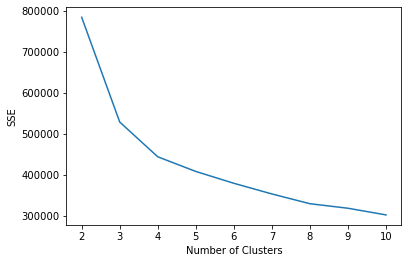

In [61]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dff)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(range(2, 11), sse, curve="convex", direction="decreasing")

kl.elbow

4

In [63]:
# instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_dff)

#view cluster assignments for each observation
kmeans.labels_

array([0, 0, 0, ..., 3, 3, 2], dtype=int32)

In [64]:
kmeans.inertia_


2041359.8857602992

In [65]:
dff['cluster'] = kmeans.labels_

#view updated DataFrame
dff

,Tour,Avg_stop,HHFAMINC_x_rich,LIF_CYC_x_SingleParent,LIF_CYC_x_Couple,LIF_CYC_x_Couplewithkids,LIF_CYC_x_Retiredhousehold,Ageclass_Middleaged,HH_RACE_x_Black,HH_RACE_x_Asian,HH_HISP_x_Hispanic,TRPTRANS_Public bus,TRPTRANS_Private car,TRPTRANS_Walk,cluster
0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1
4,1,7,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
206586,1,3,0,0,0,1,0,0,0,0,0,0,1,0,3
206587,1,3,0,0,0,1,0,0,0,0,0,0,1,0,3
206588,1,1,0,0,0,1,0,0,0,0,0,0,1,0,3


In [66]:
dff["cluster"].replace({1: "Cluster 2", 2: "Cluster 3", 0: "Cluster 1", 3: "Cluster 4", 4: "Cluster 5", 5: "Cluster 6", 6: "Cluster 7"}, inplace=True)
dff

,Tour,Avg_stop,HHFAMINC_x_rich,LIF_CYC_x_SingleParent,LIF_CYC_x_Couple,LIF_CYC_x_Couplewithkids,LIF_CYC_x_Retiredhousehold,Ageclass_Middleaged,HH_RACE_x_Black,HH_RACE_x_Asian,HH_HISP_x_Hispanic,TRPTRANS_Public bus,TRPTRANS_Private car,TRPTRANS_Walk,cluster
0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,Cluster 1
1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,Cluster 1
2,1,0,0,0,0,0,1,1,1,0,0,0,1,0,Cluster 1
3,1,0,1,0,1,0,0,0,0,0,0,0,1,0,Cluster 2
4,1,7,1,0,0,0,0,0,0,0,0,0,1,0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,1,0,0,0,0,0,1,0,0,0,0,0,1,0,Cluster 1
206586,1,3,0,0,0,1,0,0,0,0,0,0,1,0,Cluster 4
206587,1,3,0,0,0,1,0,0,0,0,0,0,1,0,Cluster 4
206588,1,1,0,0,0,1,0,0,0,0,0,0,1,0,Cluster 4


# cluster mean analysis

In [67]:
dff['cluster'].value_counts()

Cluster 1    77863
Cluster 4    67345
Cluster 2    43633
Cluster 3    17749
Name: cluster, dtype: int64

In [68]:
kk=dff.drop('Tour', axis=1).groupby('cluster').median
kk

<bound method GroupBy.median of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fd1905c7250>>

In [69]:
groups = dff.groupby('cluster')
groups

In [70]:
#Cluster mean
groups.mean()

,Tour,Avg_stop,HHFAMINC_x_rich,LIF_CYC_x_SingleParent,LIF_CYC_x_Couple,LIF_CYC_x_Couplewithkids,LIF_CYC_x_Retiredhousehold,Ageclass_Middleaged,HH_RACE_x_Black,HH_RACE_x_Asian,HH_HISP_x_Hispanic,TRPTRANS_Public bus,TRPTRANS_Private car,TRPTRANS_Walk
cluster,,,,,,,,,,,,,,
Cluster 1,1.087564,2.874048,0.177491,0.101229,0.000013,0.000000,0.730951,0.042678,0.086935,0.020690,0.052824,0.015322,0.943092,0.000000
Cluster 2,1.068251,2.339124,0.420484,0.000000,1.000000,0.000000,0.000000,0.262874,0.052781,0.044920,0.077235,0.013934,0.940458,0.000000
Cluster 3,1.180968,2.799538,0.320919,0.045467,0.206603,0.262944,0.368640,0.160065,0.069525,0.051214,0.075272,0.000000,0.000000,0.999944
Cluster 4,1.080585,2.252728,0.453515,0.000074,0.000000,0.940560,0.000000,0.295508,0.060851,0.064622,0.117796,0.007617,0.910669,0.000000


# General cluster means

In [71]:
df2['cluster'] = kmeans.labels_

#view updated DataFrame
df2

,R_AGE_x,Tour,Avg_stop,Stop,HHFAMINC_x_middleclass,HHFAMINC_x_no,HHFAMINC_x_poor,HHFAMINC_x_rich,Ageclass_Baby,Ageclass_Child,...,Full_race_HispanicWhite,Full_race_NoBlack,Full_race_NoOthers,Full_race_NoWhite,Full_race_NonhispanicAmerican Indian,Full_race_NonhispanicAsian,Full_race_NonhispanicBlack,Full_race_NonhispanicOthers,Full_race_NonhispanicWhite,cluster
0,67,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,66,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,55,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,45,1,7,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,62,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
206586,59,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
206587,22,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
206588,12,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3


In [72]:
df2["cluster"].replace({1: "Cluster 2", 2: "Cluster 3", 0: "Cluster 1", 3: "Cluster 4", 4: "Cluster 5", 5: "Cluster 6", 6: "Cluster 7"}, inplace=True)
df2

,R_AGE_x,Tour,Avg_stop,Stop,HHFAMINC_x_middleclass,HHFAMINC_x_no,HHFAMINC_x_poor,HHFAMINC_x_rich,Ageclass_Baby,Ageclass_Child,...,Full_race_HispanicWhite,Full_race_NoBlack,Full_race_NoOthers,Full_race_NoWhite,Full_race_NonhispanicAmerican Indian,Full_race_NonhispanicAsian,Full_race_NonhispanicBlack,Full_race_NonhispanicOthers,Full_race_NonhispanicWhite,cluster
0,67,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 1
1,66,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 1
2,28,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Cluster 1
3,55,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 2
4,45,1,7,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206585,62,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 1
206586,59,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 4
206587,22,1,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Cluster 4
206588,12,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Cluster 4


In [73]:
df2['cluster'].value_counts()

Cluster 1    77863
Cluster 4    67345
Cluster 2    43633
Cluster 3    17749
Name: cluster, dtype: int64

In [74]:
groupss = df2.groupby('cluster')
groupss

In [75]:
#Cluster mean
kk=groupss.mean()
kk

,R_AGE_x,Tour,Avg_stop,Stop,HHFAMINC_x_middleclass,HHFAMINC_x_no,HHFAMINC_x_poor,HHFAMINC_x_rich,Ageclass_Baby,Ageclass_Child,...,Full_race_HispanicOthers,Full_race_HispanicWhite,Full_race_NoBlack,Full_race_NoOthers,Full_race_NoWhite,Full_race_NonhispanicAmerican Indian,Full_race_NonhispanicAsian,Full_race_NonhispanicBlack,Full_race_NonhispanicOthers,Full_race_NonhispanicWhite
cluster,,,,,,,,,,,,,,,,,,,,,
Cluster 1,61.793894,1.087564,2.874048,3.045426,0.582485,0.040430,0.199594,0.177491,0.002337,0.044296,...,0.014436,0.035421,0.000013,0.000925,0.000218,0.004444,0.020485,0.085509,0.025648,0.809935
Cluster 2,47.992781,1.068251,2.339124,2.459354,0.470011,0.023491,0.086013,0.420484,0.000000,0.000000,...,0.021200,0.053400,0.000023,0.001123,0.000046,0.004034,0.044462,0.051750,0.031880,0.789448
Cluster 3,49.334667,1.180968,2.799538,3.121359,0.444645,0.028959,0.205476,0.320919,0.008169,0.123669,...,0.023663,0.047608,0.000000,0.001296,0.000000,0.004789,0.050876,0.067609,0.034030,0.766128
Cluster 4,31.437984,1.080585,2.252728,2.405212,0.452372,0.015502,0.078610,0.453515,0.023773,0.277511,...,0.030381,0.082218,0.000000,0.000639,0.000045,0.004024,0.064147,0.058787,0.036499,0.718064


In [76]:
kk.to_csv('clustermeansrich.csv')

# cross tabs

In [ ]:
crosstb = pd.crosstab(df1.HH_RACE_x, df1.cluster)
#crosstb = pd.crosstab(df1.LIF_CYC, df1.cluster)

#crosstb = pd.crosstab(df1.HH_HISP_x, df1.cluster)


crosstb.loc['Column_Total']= crosstb.sum(numeric_only=True, axis=0)
crosstb.loc[:,'Row_Total'] = crosstb.sum(numeric_only=True, axis=1)
crosstb

In [ ]:
#'Cluster 5','Cluster 6''Cluster 6','Cluster 7'

In [ ]:
#Race
#p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p

In [ ]:
crosstb = pd.crosstab(df1.TRPTRANS, df1.cluster)
#crosstb = pd.crosstab(df1.LIF_CYC, df1.cluster)

#crosstb = pd.crosstab(df1.HH_HISP_x, df1.cluster)


crosstb.loc['Column_Total']= crosstb.sum(numeric_only=True, axis=0)
crosstb.loc[:,'Row_Total'] = crosstb.sum(numeric_only=True, axis=1)
crosstb

In [ ]:
#p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p

In [ ]:

crosstb = pd.crosstab(df1.HHFAMINC_x, df1.cluster)


crosstb.loc['Column_Total']= crosstb.sum(numeric_only=True, axis=0)
crosstb.loc[:,'Row_Total'] = crosstb.sum(numeric_only=True, axis=1)
crosstb

In [ ]:
p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Row_Total']].div(crosstb.Row_Total, axis=0)*100
#p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p

In [ ]:

crosstb = pd.crosstab(df1.LIF_CYC_x, df1.cluster)

crosstb.loc['Column_Total']= crosstb.sum(numeric_only=True, axis=0)
crosstb.loc[:,'Row_Total'] = crosstb.sum(numeric_only=True, axis=1)
crosstb

In [ ]:
#p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p

In [ ]:

crosstb = pd.crosstab(df1.HH_HISP_x_Hispanic, df1.cluster)

crosstb.loc['Column_Total']= crosstb.sum(numeric_only=True, axis=0)
crosstb.loc[:,'Row_Total'] = crosstb.sum(numeric_only=True, axis=1)
crosstb

In [ ]:
#p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p=crosstb[['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Row_Total']].div(crosstb.Row_Total, axis=0)*100
p

In [ ]:
### Get all the features columns except the class
#features = list(df2.columns)[:-2]

### Get the features data
data = df2[features]
data

In [ ]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

In [ ]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()